In [220]:
# Tratamiento de datos REGRESION LINEL DECISION TREE
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
#otros
from scipy.stats import chi2_contingency
# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

Happy coding 🤔

# Pair Programming Decision Tree

## Ana Campos y Ana González



En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal. El objetivo de hoy es:
-  Ajustar el modelo a un Decision Tree
-  Extraer las métricas
-  Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [221]:
df = pd.read_csv("data/08-primas_categorizadas_normalizadas.csv", index_col = 0)
df.shape

(1064, 14)

In [222]:
df2 = pd.read_csv("data/09-primas-altas.csv", index_col = 0)
df2.shape

(273, 10)

## Primas bajas

In [223]:
# al igual que en la regresión lineal tenemos que separar nuestro dataframe en X e y

X = df.select_dtypes(np.number).drop("charges_Sklearn", axis = 1)
y = df["charges_Sklearn"]

In [224]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)



DecisionTreeRegressor(random_state=0)

In [226]:

# max depth

print(arbol.tree_.max_depth)

19


In [227]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [228]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo): #FUNCIO PARA METRICAS DE REGRESION
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [229]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results_bajas = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results_bajas

,MAE,MSE,RMSE,R2,set,modelo
0,0.069973,0.032242,0.179560,0.492549,test,Decission Tree I
1,0.000780,0.000259,0.016081,0.995836,train,Decission Tree I


---------------
Recordemos cuando había *overfitting* o *overfitting* 

- Si los valores del *train* son MUCHO MEJOR (que es tener métricas más bajas, excepto en el R² que sería tener valores más altos) que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.

- Si los valores del *train* son MUCHO PEOR (valores de las métricas más altas, excepto en el R² que sería tener valores más bajos) que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.

-------------------

        Tenemos overfitting

In [230]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train.columns))
max_features

3.1622776601683795

In [231]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra
                       # anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos 
                         #como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [232]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [233]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [234]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir 
#el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=4, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

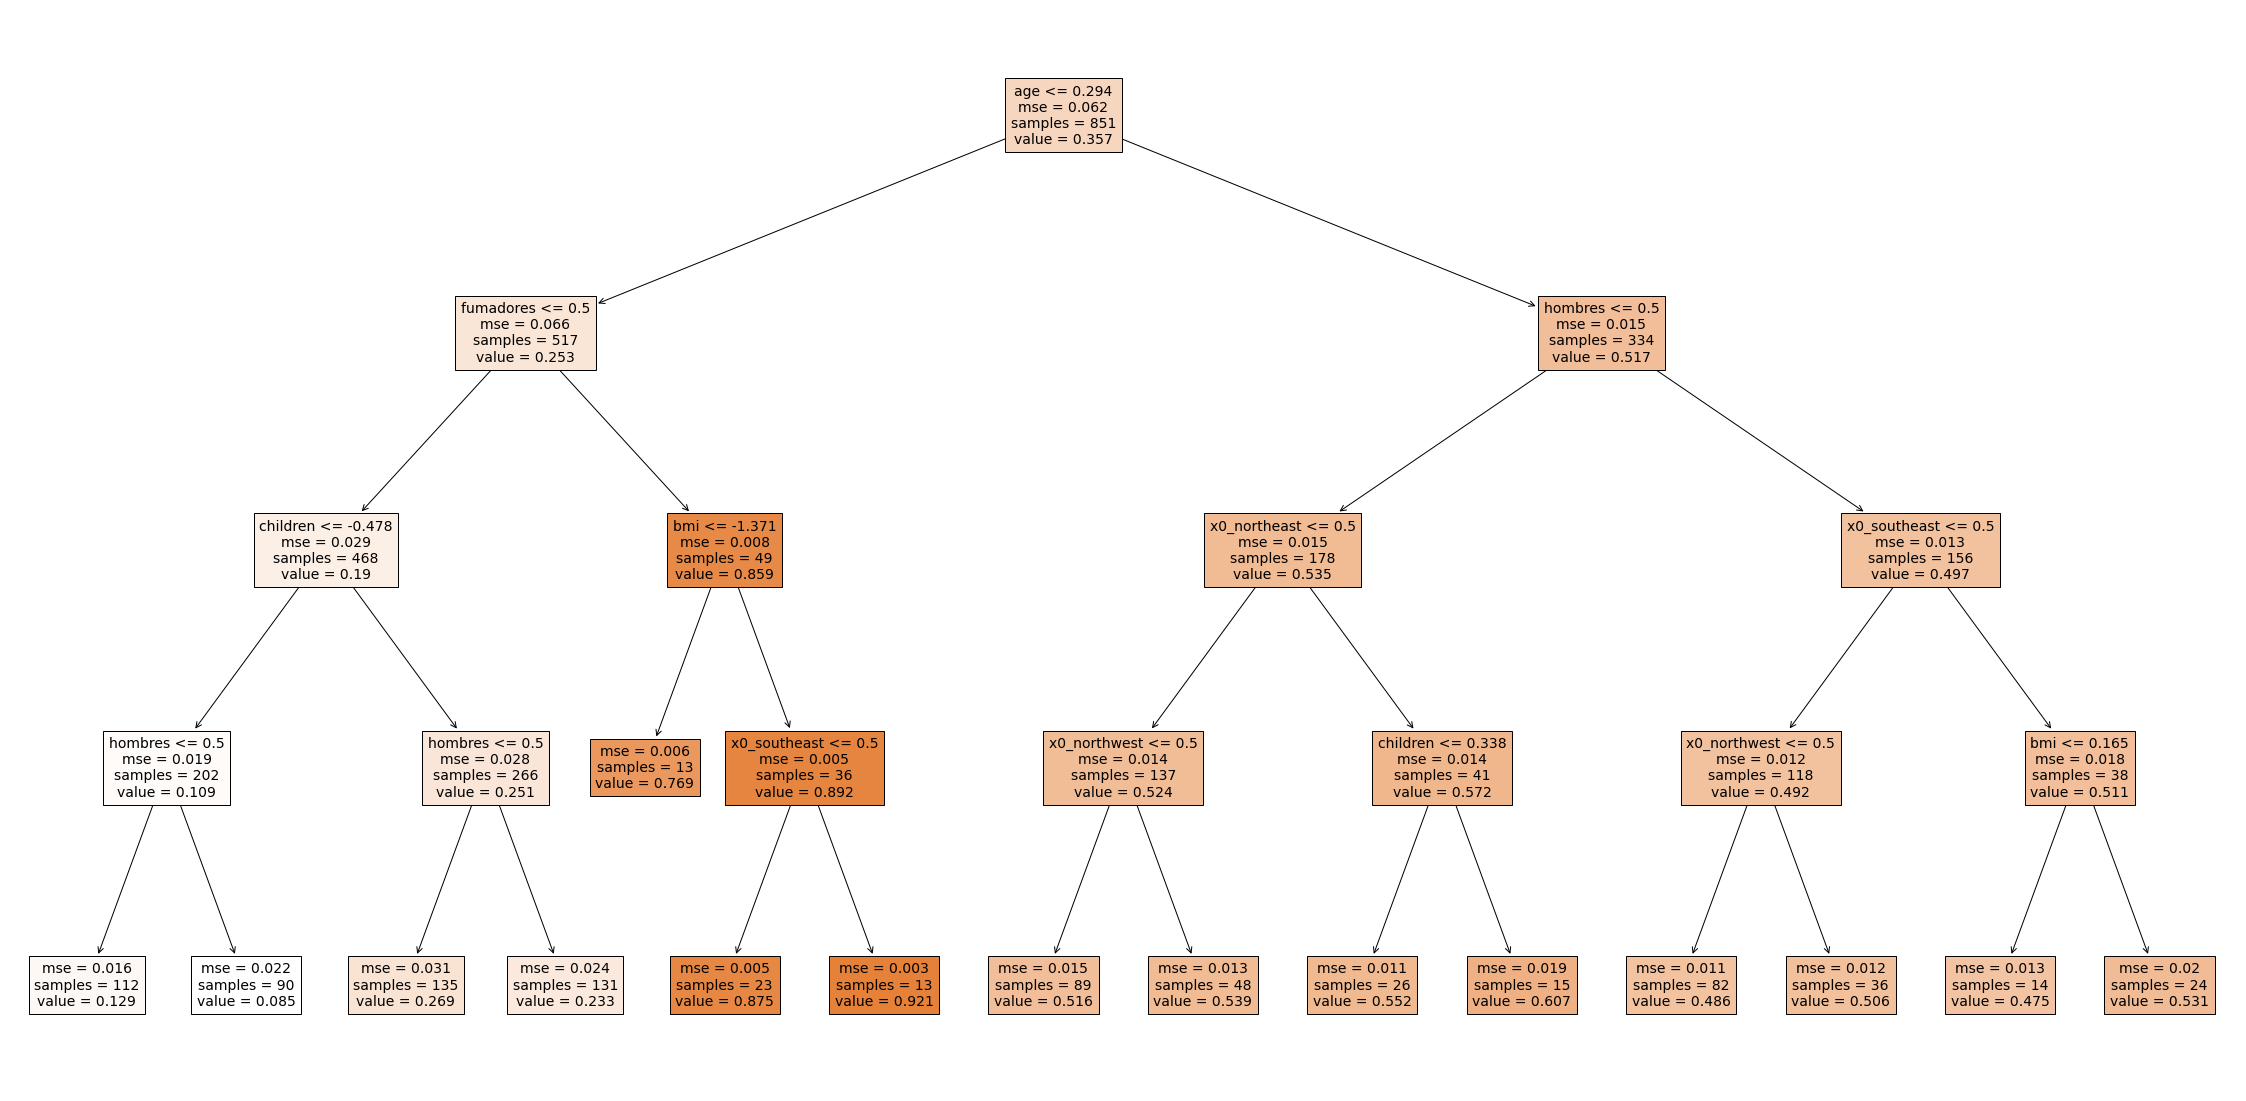

In [235]:
# veamos ahora que pinta tiene nuestro árbol


fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [236]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [237]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2



,MAE,MSE,RMSE,R2,set,modelo
0,0.109487,0.027527,0.165911,0.566763,test,Decision tree II
1,0.092964,0.018743,0.136907,0.698199,train,Decision tree II


In [238]:

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,fumadores,0.537969
0,age,0.382391
2,children,0.063210
5,hombres,0.008307
1,bmi,0.004665
6,x0_northeast,0.001993
8,x0_southeast,0.000742
7,x0_northwest,0.000722
4,mujeres,0.000000
9,x0_southwest,0.000000


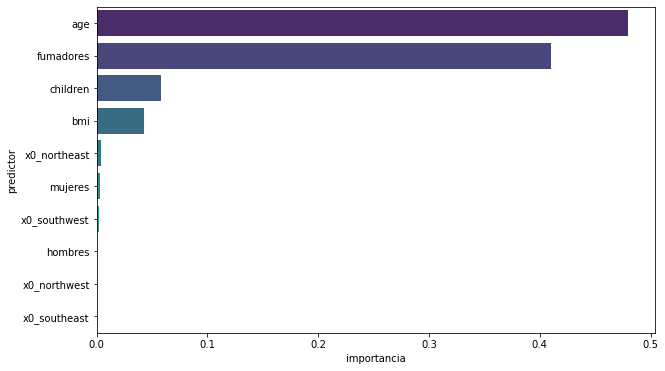

In [186]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Despues de correr varias veces el código, tenemos en todos los arboles algo de overfitting, menos en los casos en los que hemos bajado la profundidad a 4, en los que la r2 se nos reduce casi al 50,pasamos de valores predictorios de 0.72 a valores de 0.5. Aun asi, nos sigue saliendo algo de overfitting. En todos los casos, nos ordena las variables predictoras segun importancia igual: edad>tabaco>hijos

In [239]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results_bajas = pd.concat([dt_results_bajas, dt_results2], axis = 0)
df_decision_results_bajas

,MAE,MSE,RMSE,R2,set,modelo
0,0.069973,0.032242,0.179560,0.492549,test,Decission Tree I
1,0.000780,0.000259,0.016081,0.995836,train,Decission Tree I
0,0.109487,0.027527,0.165911,0.566763,test,Decision tree II
1,0.092964,0.018743,0.136907,0.698199,train,Decision tree II


In [240]:
df_decision_results_bajas.to_csv('data/df_decision_results_bajas.csv')

## Primas altas

In [119]:
# al igual que en la regresión lineal tenemos que separar nuestro dataframe en X e y

X2 = df2.select_dtypes(np.number).drop("charges", axis = 1)
y2 = df2["charges"]

In [120]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [121]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol2 = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol2.fit(x_train2, y_train2)



DecisionTreeRegressor(random_state=0)

In [122]:

# max depth

print(arbol2.tree_.max_depth)

15


In [123]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt2 = arbol2.predict(x_test2)
y_pred_train_dt2 = arbol2.predict(x_train2)

In [124]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results_altas = metricas(y_test2, y_train2, y_pred_test_dt2, y_pred_train_dt2, "Decission Tree I")
dt_results_altas

,MAE,MSE,RMSE,R2,set,modelo
0,2953.70266,3.247707e+07,5698.865839,0.685491,test,Decission Tree I
1,0.00000,0.000000e+00,0.000000,1.000000,train,Decission Tree I


---------------
Recordemos cuando había *overfitting* o *overfitting* 

- Si los valores del *train* son MUCHO MEJOR (que es tener métricas más bajas, excepto en el R² que sería tener valores más altos) que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.

- Si los valores del *train* son MUCHO PEOR (valores de las métricas más altas, excepto en el R² que sería tener valores más bajos) que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.

-------------------

        Tenemos overfitting

In [125]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features2 = np.sqrt(len(x_train2.columns))
max_features2

2.449489742783178

In [144]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param2 = {"max_depth": [2,3], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra
                       # anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos 
                         #como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 25, 50],
        "min_samples_leaf": [10,25,50]} 


In [145]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param2, # que hiperparámetros queremos que testee
            cv=5, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [146]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs2.fit(x_train2, y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 25, 50],
                         'min_samples_split': [10, 25, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [147]:
# este método nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 variables predictoras para construir 
#el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeRegressor(max_depth=3, max_features=4, min_samples_leaf=10,
                      min_samples_split=25)

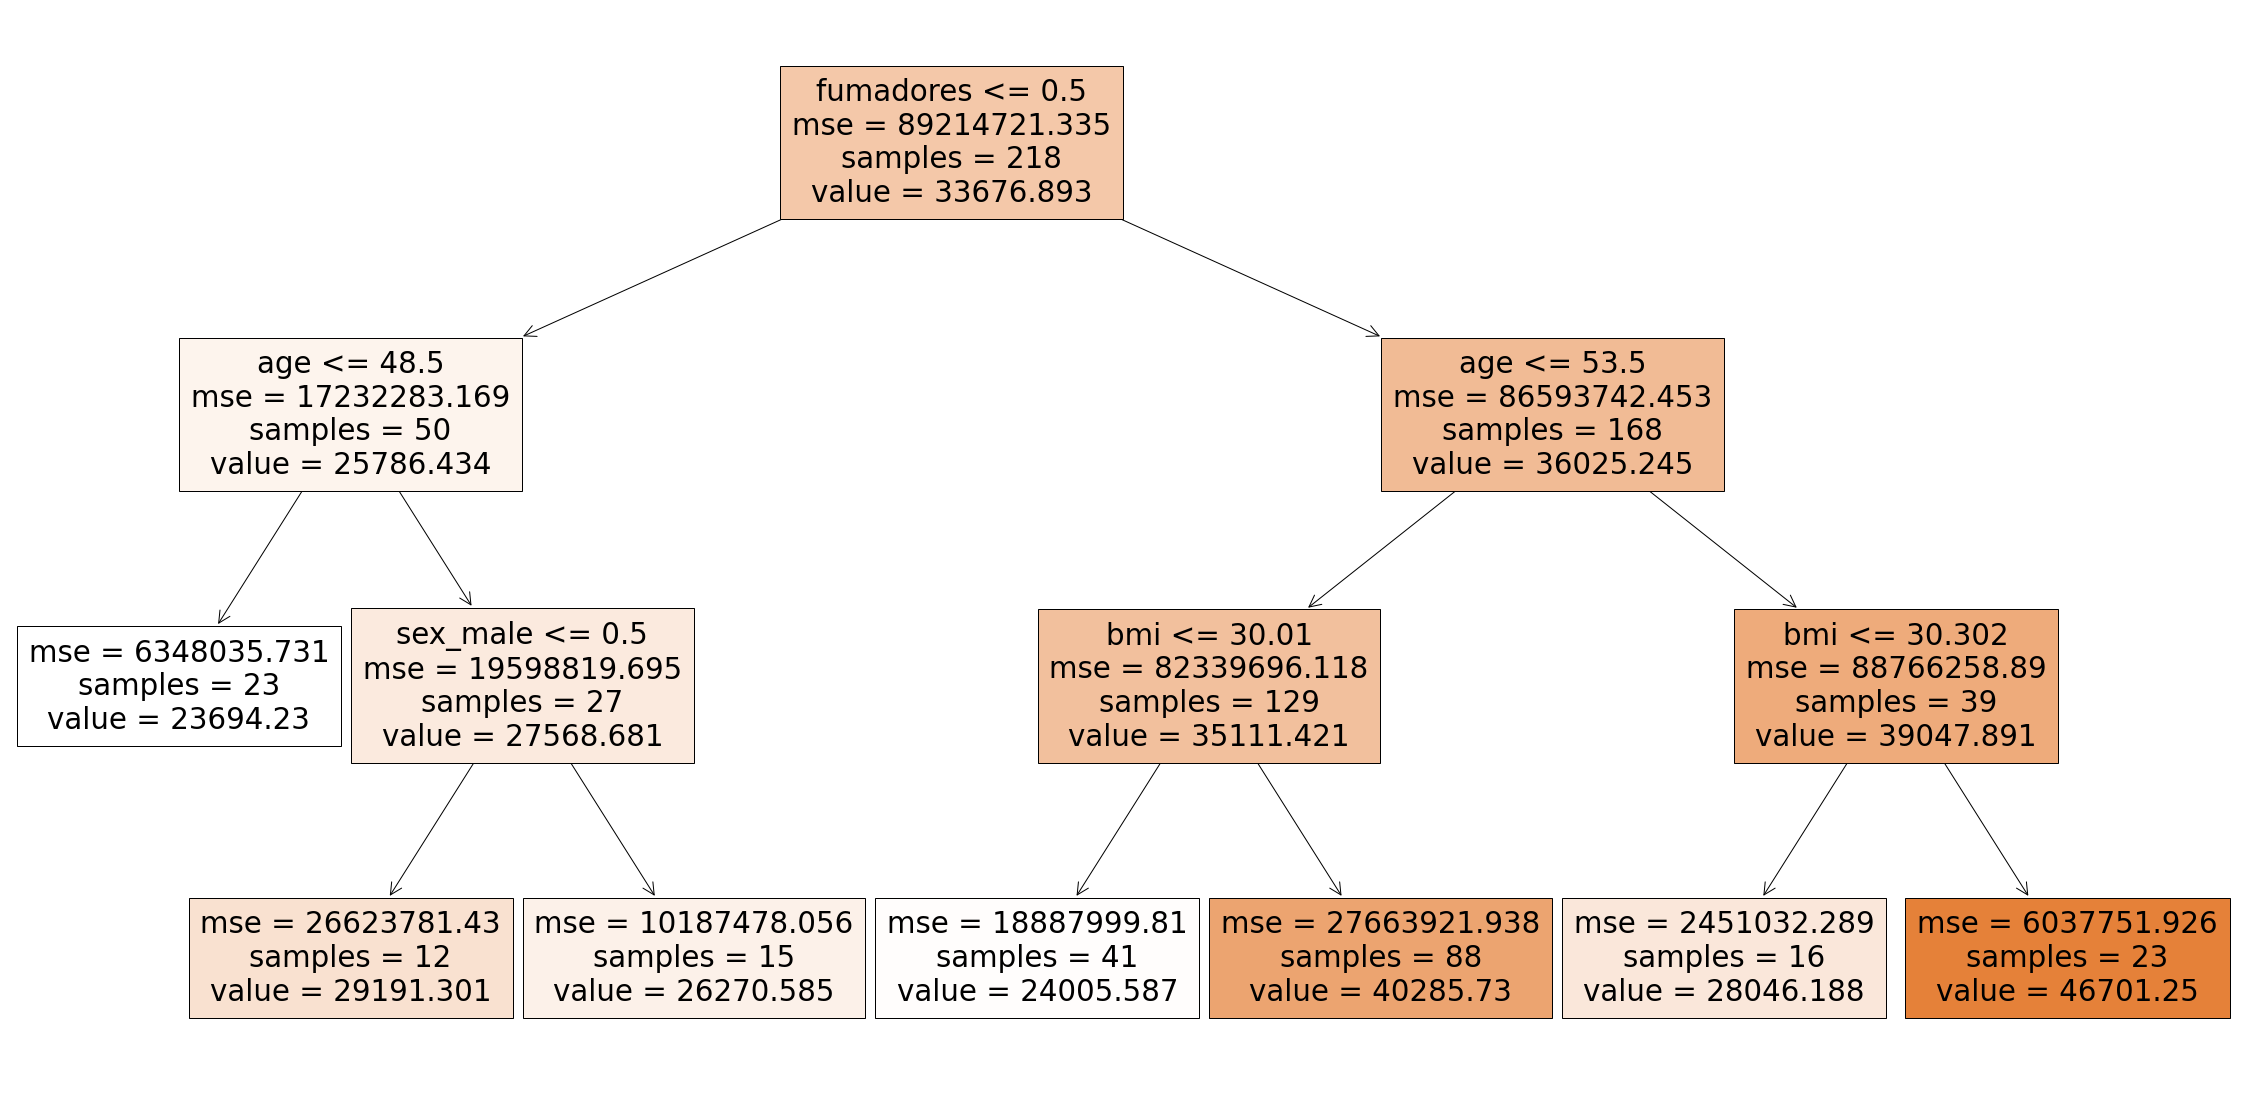

In [148]:
# veamos ahora que pinta tiene nuestro árbol


fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo2, feature_names=x_train2.columns, filled=True);

In [149]:
y_pred_test_dt2 = mejor_modelo2.predict(x_test2)
y_pred_train_dt2 = mejor_modelo2.predict(x_train2)

In [150]:
dt_results2 = metricas(y_test2, y_train2, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2



,MAE,MSE,RMSE,R2,set,modelo
0,3885.388739,2.897545e+07,5382.884673,0.719401,test,Decision tree II
1,3015.021284,1.837257e+07,4286.323623,0.794063,train,Decision tree II


In [151]:

# vamos a crearnos un dataframe 
importancia_predictores2 = pd.DataFrame(
                            {'predictor': x_train2.columns,
                             'importancia': mejor_modelo2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores2.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores2


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,bmi,0.692636
3,fumadores,0.261561
0,age,0.042120
5,sex_male,0.003682
2,children,0.000000
4,sex_female,0.000000


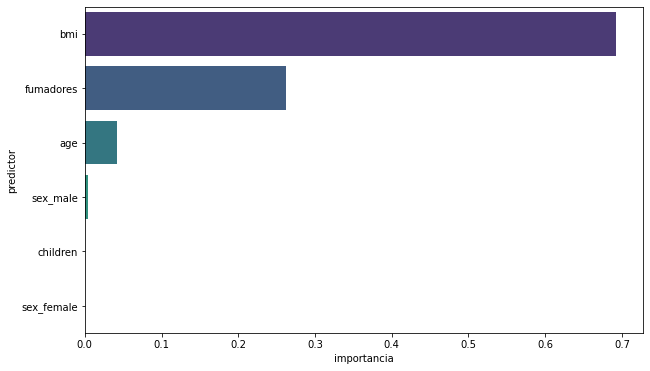

In [152]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores2, palette="viridis");
plt.show()

<AxesSubplot:xlabel='charges', ylabel='bmi'>

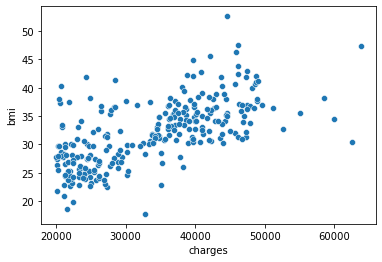

In [161]:
sns.scatterplot(x=df2['charges'], y=df2['bmi'], data=df2)

<AxesSubplot:xlabel='charges', ylabel='bmi'>

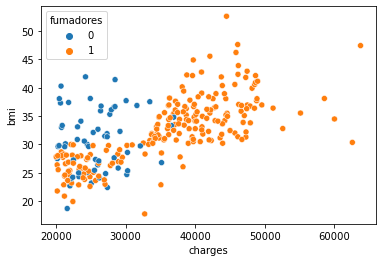

In [165]:
sns.scatterplot(x=df2['charges'], y=df2['bmi'], data=df2, hue=df2['fumadores'])

<AxesSubplot:xlabel='fumadores', ylabel='charges'>

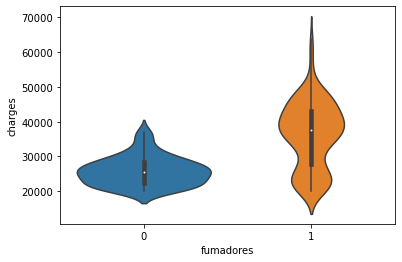

In [164]:
sns.violinplot(y=df2['charges'], x=df2['fumadores'], data=df2)

In [154]:
df2.corr()

,age,bmi,children,charges,fumadores,sex_female,sex_male
age,1.000000,-0.107578,0.028092,0.072790,-0.103686,0.048999,-0.048999
bmi,-0.107578,1.000000,0.046876,0.644481,0.131032,-0.081613,0.081613
children,0.028092,0.046876,1.000000,0.039187,-0.013573,-0.050136,0.050136
charges,0.072790,0.644481,0.039187,1.000000,0.454657,-0.072232,0.072232
fumadores,-0.103686,0.131032,-0.013573,0.454657,1.000000,-0.094462,0.094462
sex_female,0.048999,-0.081613,-0.050136,-0.072232,-0.094462,1.000000,-1.000000
sex_male,-0.048999,0.081613,0.050136,0.072232,0.094462,-1.000000,1.000000


In [158]:
primas_bmi=pd.DataFrame(pd.crosstab(df2['charges'],df2['bmi']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
primas_bmi

bmi,17.765,18.715,19.950,20.900,21.800,22.420,22.610,22.705,22.880,22.895,...,42.350,42.750,42.900,43.890,44.880,45.540,46.200,47.410,47.600,52.580
charges,,,,,,,,,,,,,,,,,,,,,
20009.63365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20149.32290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20167.33603,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20177.67113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20234.85475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55135.40209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58571.07448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60021.39897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
chi2 = chi2_contingency(primas_bmi)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en las primas según el bmi, con una p de {round(chi2[1], 2)}")
else:
    print

Existen diferencias significativas en Europa en el tipo de educacion según el género de las personas en activo, con una p de 0.0


Nos quedamos con este modelo, no tenemos overfitting, nos quedamos con el, comprabmos las relaciones, porque en el inicio, antes de dividir los dataset, el bmi no nos salia muy correlacionado con las primas.(aunque venimos de rechazor modelos con valores de overfitting similares)

In [157]:
# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results_altas = pd.concat([dt_results_altas, dt_results2], axis = 0)
df_decision_results_altas

,MAE,MSE,RMSE,R2,set,modelo
0,2953.702660,3.247707e+07,5698.865839,0.685491,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I
0,3885.388739,2.897545e+07,5382.884673,0.719401,test,Decision tree II
1,3015.021284,1.837257e+07,4286.323623,0.794063,train,Decision tree II


In [241]:
df_decision_results_altas.to_csv('data/df_decision_results_altas.csv')